# Final Project Group 6
Group members:
- Niccolo Matteo Borgato
- Nicholas Dieke
- Austin Brees
- Sophie Schaesberg
- Adrian Marino

## Introduction

Football is one of the most popular sports in the world, with millions of fans and billions of dollars in revenue generated each year. One of the key factors that contributes to the success of a football team is the quality of its players, and as a result, the market value of football players has become a crucial metric for teams, agents, and fans alike. In this machine learning problem, we aim to predict the market value of football players using a dataset of various player attributes such as age, position, and performance statistics. By accurately predicting a player's market value, we can provide valuable insights to clubs and agents on potential player transfers, and help fans to better understand the true value of their favorite players. This is an exciting and challenging problem that requires a combination of data analysis, statistical modeling, and machine learning techniques, and has the potential to revolutionize the way football clubs operate in the transfer market.

## Importing libraries

In [2144]:
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing Data

In [2145]:
players = pd.read_csv('players.csv')
player_valuations = pd.read_csv('player_valuations.csv')
appearances = pd.read_csv('appearances.csv')
clubs = pd.read_csv('clubs.csv')

## Market Value over the years

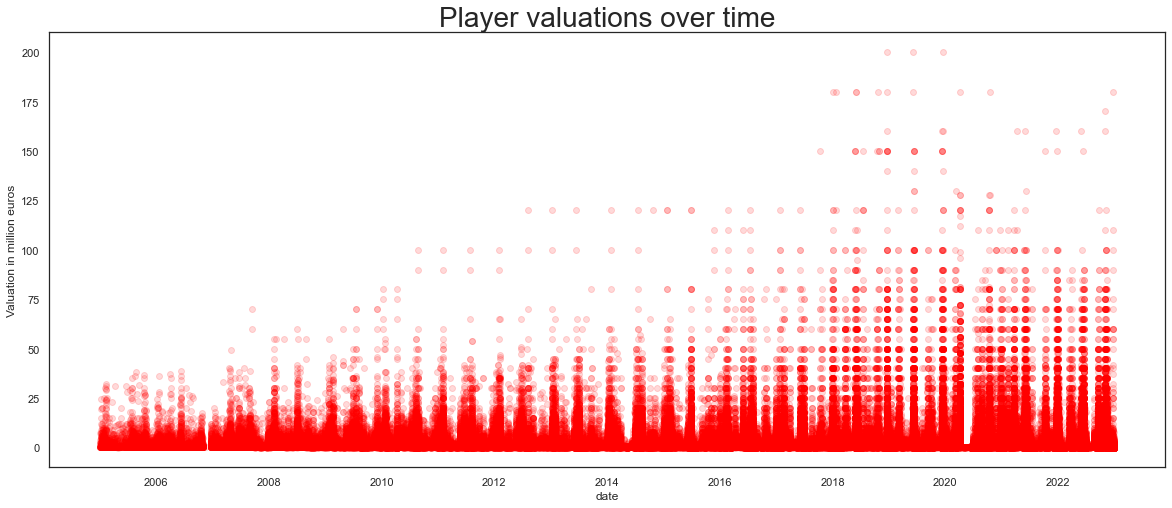

In [2146]:
# add year to player valuations
player_valuations['datetime']=pd.to_datetime(player_valuations['datetime'], format="%Y-%m-%d")
player_valuations['year']=player_valuations['datetime'].dt.year

#filter range
player_valuations_df = player_valuations[(player_valuations.year > 2004 ) & (player_valuations.year < 2023 )]
high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000 )]
positions=players['position'].unique()

# Visualize of valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='red',alpha=0.15)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

## Players Dataset: Exploration and Tranformation

In [2147]:
players.head(3)

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,...,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,...,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,...,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...


#### Player with highest market value

In [2148]:
highest_market_val_player = players.loc[[players['market_value_in_eur'].idxmax()]]
highest_market_val_player

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
25338,342229,Kylian Mbappé,583,Fc Paris Saint Germain,France,France,Bondy,1998-12-20,Attack,Centre-Forward,...,200000000.0,NaN,2025-06-30,FR1,Kylian,Mbappé,kylian-mbappe,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/kylian-mbappe/...


#### Dropping irrelevant features
market_value_in_eur is here too because we will use the value from player_valuations.csv

In [2149]:
players = players.drop(columns=['name', 'country_of_citizenship', 'sub_position', 'market_value_in_eur', 'current_club_name', 'country_of_birth', 'highest_market_value_in_eur', 'agent_name', 'city_of_birth', 'first_name', 'last_name', 'player_code', 'image_url', 'url'])

#### Only consider players that have played since 2015
This is because, we can see that market value has been going up over the years. The model should be trained on recent data.

In [2150]:
players = players[players.last_season > 2015 ]

#### Formatting dates

In [2151]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players['contract_expiration_date'] = pd.to_datetime(players['contract_expiration_date'])
players['contract_expiration_year'] = players['contract_expiration_date'].dt.year
players = players.drop(columns=['contract_expiration_date'])

## Players Valuations Dataset: Exploration and Tranformation

In [2153]:
player_valuations.head(3)

,date,datetime,dateweek,player_id,current_club_id,market_value_in_eur,player_club_domestic_competition_id,year
0,2013-08-07,2013-08-07,2013-08-05,99946,1095,150000,FR1,2013
1,2014-01-13,2014-01-13,2014-01-13,99946,1095,100000,FR1,2014
2,2010-01-29,2010-01-29,2010-01-25,76948,979,125000,PO1,2010


#### Dropping irrelevant features

In [2154]:
player_valuations = player_valuations.drop(columns=['date', 'dateweek', 'current_club_id', 'player_club_domestic_competition_id'])

#### Formatting dates

In [2155]:
player_valuations['datetime'] = pd.to_datetime(player_valuations['datetime'])
player_valuations['year'] = player_valuations['datetime'].dt.year
player_valuations = player_valuations.drop(columns=['datetime'])

#### Averaging the market values per player per year

In [2156]:
player_mean_year_val = player_valuations.groupby(['player_id', 'year'])['market_value_in_eur'].mean().reset_index()
player_mean_year_val

,player_id,year,market_value_in_eur
0,10,2004,7.000000e+06
1,10,2005,1.200000e+07
2,10,2006,2.500000e+07
3,10,2007,2.300000e+07
4,10,2008,2.000000e+07
...,...,...,...
213168,1050249,2022,8.333333e+04
213169,1050852,2022,5.000000e+04
213170,1052404,2022,5.000000e+04
213171,1056907,2022,1.000000e+05


## Appearances Dataset: Exploration and Tranformation

In [2157]:
appearances.head(3)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90
2,2483937_67064,2483937,67064,28095,4128,2014-08-08,Felicio Brown Forbes,RU1,0,0,0,0,90


#### Dropping irrelevant features

In [2158]:
appearances = appearances.drop(columns=['player_name', 'player_current_club_id', 'appearance_id'])


#### Formatting dates

In [2159]:
appearances['date'] = pd.to_datetime(appearances['date'])
appearances['year'] = appearances['date'].dt.year


#### Grouped stats by player

In [2160]:
players_stats_df = appearances.drop(columns=["game_id", "player_club_id"]).groupby(["player_id", "year"]).sum()
players_stats_df = players_stats_df.reset_index()
players_stats_df.head(3)

,player_id,year,yellow_cards,red_cards,goals,assists,minutes_played
0,10,2014.0,2,0,4,3,496
1,10,2015.0,6,0,12,8,2429
2,10,2016.0,1,0,8,5,1078


## Clubs Dataset: Exploration and Tranformation

In [2161]:
clubs.head(3)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url
0,1032,fc-reading,Fc Reading,GB1,33.66,26,25.9,12,46.2,6,Select Car Leasing Stadium,24161,+£8.37m,Brian McDermott,https://www.transfermarkt.co.uk/fc-reading/sta...
1,2323,orduspor,Orduspor,TR1,NaN,0,NaN,0,NaN,0,19 Eylül Stadyum,11024,+-0,Héctor Cúper,https://www.transfermarkt.co.uk/orduspor/start...
2,1387,acn-siena-1904,Acn Siena 1904,IT1,4.32,30,26.2,6,20.0,2,Artemio Franchi,15373,£-6Th.,Serse Cosmi,https://www.transfermarkt.co.uk/acn-siena-1904...


## Merging Datasets

In [2162]:
players = players.merge(players_stats_df, on="player_id", how='inner').merge(player_mean_year_val, on=['player_id', 'year'], how='inner').merge(clubs[['club_id','stadium_seats', 'national_team_players']], left_on=['current_club_id'], right_on=['club_id'], how='inner')
players = players.drop(columns=['current_club_id', 'club_id'])
players.head(3)

,player_id,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,last_season,contract_expiration_year,year,yellow_cards,red_cards,goals,assists,minutes_played,market_value_in_eur,stadium_seats,national_team_players
0,417103,1995-06-16,Attack,Right,185,PO1,2016,NaN,2017.0,0,0,0,0,98,300000.0,5000,5
1,340538,1996-10-22,Attack,Left,187,PO1,2016,NaN,2016.0,1,0,0,0,240,300000.0,5000,5
2,118309,1991-05-16,Attack,Right,193,PO1,2016,NaN,2014.0,1,0,1,2,860,1500000.0,5000,5


#### Adding Age Feature

In [2163]:
def calculate_age(dob, year):
    return year - dob.year

# drop players with no date of birth
players = players[players['date_of_birth'].isnull() == False]
today = date.today()
players['age'] = players.apply(lambda x: calculate_age(x.date_of_birth, x.year), axis=1)

players = players.drop(columns=['date_of_birth'])


#### Dealing with null values

In [2164]:
players['contract_expiration_year'] = players['contract_expiration_year'].fillna(players['last_season']+1)
players = players.drop(columns=['last_season'])

In [2165]:
players['foot'] = players['foot'].fillna('Right')

## Correlation Matrix

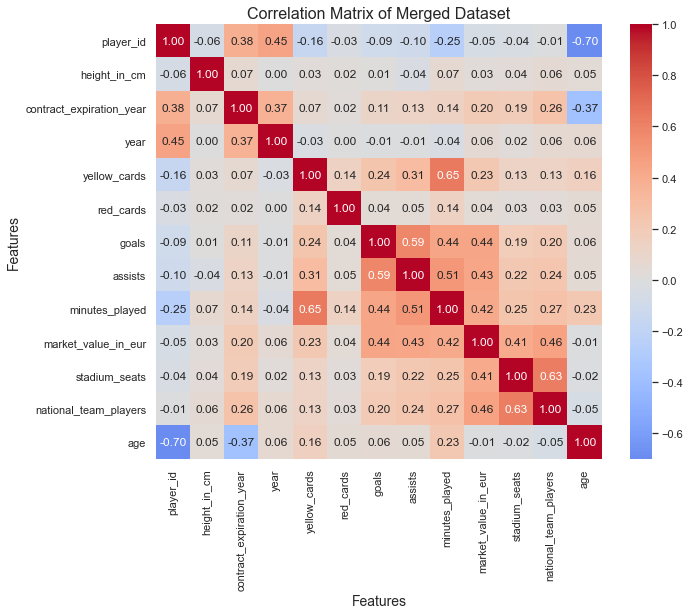

In [2166]:
# calculate the correlation matrix
corr_matrix = players.corr()

# create a heatmap with the correlation matrix
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, ax=ax)

# set the plot title and axis labels
ax.set_title('Correlation Matrix of Merged Dataset', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# show the plot
plt.show()

#### Further Feature Engineering From Corr. Matrix

In [2167]:
players = players.drop(columns=['height_in_cm', 'year'])

## Encoding values

In [2168]:
players = pd.get_dummies(players)

In [2169]:
players = players.sort_values(by=['player_id'])
players.head(3)

,player_id,contract_expiration_year,yellow_cards,red_cards,goals,assists,minutes_played,market_value_in_eur,stadium_seats,national_team_players,...,current_club_domestic_competition_id_GB1,current_club_domestic_competition_id_GR1,current_club_domestic_competition_id_IT1,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1
21602,26,2018.0,0,0,0,0,181,9.166667e+05,81365,14,...,0,0,0,1,0,0,0,0,0,0
21601,26,2018.0,1,0,0,0,1380,1.000000e+06,81365,14,...,0,0,0,1,0,0,0,0,0,0
21600,26,2018.0,0,0,0,0,2160,2.000000e+06,81365,14,...,0,0,0,1,0,0,0,0,0,0


---

## Regression

In [2170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV


#### Preparing for Regression

In [2171]:

X = players.drop(columns=['market_value_in_eur', 'player_id'])
y = players['market_value_in_eur']

# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# Run standardization on X variables
X_train = scale(X_train)
X_test = scale(X_test)

## Linear Regression

In [2172]:
lin_reg = LinearRegression().fit(X_train, y_train)

#### Get R2 score

In [2173]:
lin_reg.score(X_train, y_train)

0.4179916434045181

#### Cross validation

In [2174]:
lr_scores = abs(cross_val_score(lin_reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error'))
lr_scores

array([7063476.93482851, 7199481.39212873, 7305346.82851507,
       7539783.07175945, 6978801.03429868, 7149217.05987254,
       7353711.31317224, 6648323.35520934, 6597718.70707561,
       6581161.75072463])

#### Training Set Score

In [2175]:
lr_score_train = np.mean(lr_scores)
lr_score_train

7041702.14475848

#### Test Set Prediction Score

In [2176]:
y_predicted = lin_reg.predict(X_test)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lr_score_test

7.322368723089519e+17

## Lasso Regression

In [2177]:
lasso_reg = LassoCV().fit(X_train, y_train)

#### Get R2 Score

In [2178]:
lasso_reg.score(X_train, y_train)

0.4180117482517639

#### Cross validation

In [2179]:
lasso_scores = abs(cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error'))
lasso_scores

array([7063526.50661584, 7200133.52355831, 7305076.99235337,
       7539935.91871184, 6979337.59127374, 7145851.00686131,
       7354600.10366094, 6648116.03636008, 6596708.70718096,
       6579646.83921036])

#### Training Set Score

In [2180]:
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

7041293.322578676

#### Test Set Prediction Score

In [2181]:
y_predicted = lasso_reg.predict(X_test)
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

6790923.164340828

## Ridge Regression (L2 regularization)

In [2182]:
ridge_reg = RidgeCV().fit(X_train, y_train)


#### Get R2 score

In [2183]:
ridge_reg.score(X_train, y_train)

0.41802498369898533

#### Cross validation

In [2184]:
ridge_scores = abs(cross_val_score(ridge_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error'))
ridge_scores

array([7063391.8263668 , 7199466.31678126, 7305358.41126212,
       7539828.07857836, 6979339.81841259, 7146074.42050402,
       7353338.78087144, 6648190.22472964, 6597504.40613318,
       6580572.11484246])

#### Training Set Score

In [2185]:
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

7041306.439848187

#### Test Set Prediction Score

In [2186]:
y_predicted = ridge_reg.predict(X_test)
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

6791034.418402066

## Principal Components Regression

In [2187]:
lin_reg = LinearRegression()
rmse_list = []

### First generate all the principal components

In [2188]:
pca = PCA()
X_train_pc = pca.fit_transform(X_train)
X_train_pc.shape

(45410, 30)

### Loop through different count of principal components for linear regression

In [2189]:

for i in range(1, X.shape[1]+1):
    rmse_score = abs(cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean())
    rmse_list.append(rmse_score)

#### Plot RMSE per PC count

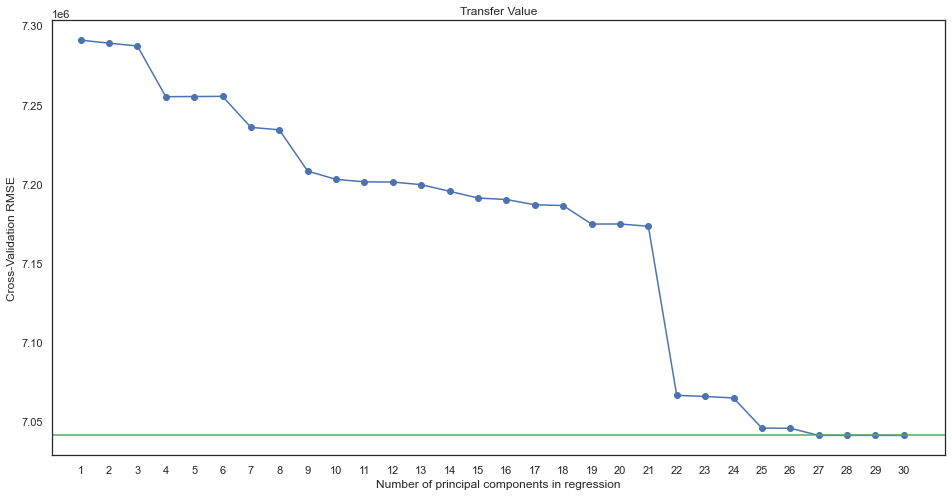

In [2201]:
# Create a larger figure
fig = plt.figure(figsize=(16, 8))

# Plot the data
plt.plot(rmse_list, '-o')

# Add labels and title
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Transfer Value')

# Set the x-axis limits and tick labels
plt.xlim(xmin=-1)
plt.xticks(np.arange(X.shape[1]), np.arange(1, X.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

# Show the plot
plt.show()

#### Visually determine optimal number of principal components


In [2191]:
best_pc_num = 27

#### Train model on training set

In [2192]:
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

#### Get R2 score


In [2193]:
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.418024990942951

#### Cross validation

In [2194]:
pcr_score_train = abs(cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean())
pcr_score_train

7041310.543915987

#### Get principal components of test set


In [2195]:
X_test_pc = pca.transform(X_test)[:,:best_pc_num]
X_test_pc.shape

(15137, 27)

#### Predict on test data


In [2196]:
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

6791062.3595784865

## Evaluation

In [2197]:
train_metrics = np.array([round(lr_score_train,2), 
                          round(lasso_score_train,2), 
                          round(ridge_score_train,2), 
                          round(pcr_score_train,2)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                       'Lasso Regression', 
                       'Ridge Regression', 
                       f'PCR ({best_pc_num} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,7041702.14
Lasso Regression,7041293.32
Ridge Regression,7041306.44
PCR (27 components),7041310.54


In [2198]:
test_metrics = np.array([round(lr_score_test,2), 
                         round(lasso_score_test,2), 
                         round(ridge_score_test,2), 
                         round(pcr_score_test,2)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                      'Lasso Regression', 
                      'Ridge Regression', 
                      f'PCR ({best_pc_num} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,7.322369e+17
Lasso Regression,6.790923e+06
Ridge Regression,6.791034e+06
PCR (27 components),6.791062e+06


## Discussion

Based on the provided RMSE scores, it appears that the Lasso, Ridge, and PCR models performed similarly well on both the train and test sets, with low RMSE scores indicating that they are good at predicting football players' market value. However, the Linear Regression model had a much lower RMSE on the train set but a significantly higher RMSE on the test set, indicating that it may be overfitting to the training data and not generalizing well to new, unseen data.

From this analysis, we can conclude that the Lasso, Ridge, and PCR models are likely more suitable solutions for predicting football players' market value than the Linear Regression model. Among these three models, the Lasso and Ridge models may be preferred due to their ability to perform feature selection and reduce the impact of multicollinearity.

It's worth noting that the RMSE values reported here are quite high, indicating that the regression models are not doing a great job of predicting the market values of football players. One possible explanation for this is that the market values of players are influenced by a wide variety of factors that are difficult to capture using the available data. Therefore, additional work in feature engineering could lead to further improvements in the model's predictive power. For example, you might consider incorporating data on a player's performance against specific opponents, as well as information about the player's injury history, and other off-field factors that could influence their market value. By carefully selecting and engineering features, it may be possible to build a more accurate and reliable model for predicting the market values of football players.

Additionally, there may be significant variations in the valuation of players across different leagues and markets, which could be difficult to account for using a single model. Therefore, while the regression models presented here may provide some insight into the factors that influence market values.

The application of machine learning solutions can provide valuable insights for addressing the underlying problem of predicting football players' market value. By analyzing the relationships between various player attributes and market value, we can identify which attributes are most important for predicting market value and gain a better understanding of the factors that drive player value in the football industry. This information can be used by clubs, agents, and other stakeholders to make more informed decisions about player transfers, contracts, and other business decisions.